# Coupled Harmonic Oscillators and Normal Modes
This notebook shows how to describe the motion of a system of coupled harmonic oscillators. It is, furthermore,  shown how conversion into Normal Modes can help better understand the dynamics of the system.

In [1]:
import numpy as np

from scipy.integrate import solve_ivp
# visualization library
import matplotlib.pyplot as plt

In [2]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [3]:
def kmatrix(k):
    l=len(k)
    kmat=np.zeros([l,l])
    for i in range(l-1):
        kmat[i,i]=k[i]+k[i+1]
        kmat[i+1,i]=-k[i+1]
        kmat[i,i+1]=-k[i+1]
    kmat[l-1,l-1] = k[l-1]
    return kmat

In [4]:
def mmatrix(m):
    l=len(m)
    mmat=np.zeros([l,l])
    for i in range(l):
        mmat[i,i]=m[i]
    return mmat

In [5]:
def minverse(m):
    l=len(m)
    minv=np.zeros([l,l])
    for i in range(l):
        minv[i,i]=1/m[i]
    return minv

In [435]:
def coupledOscillators(t, x, minv, cmat, kmat, d, wf):
    l=len(x)
    ix=int(l/2)
    dxdt=np.zeros(l)
    dxdt[0:ix]=x[ix:l]
    dxdt[ix:l]=np.inner(minv,(-np.inner(kmat,x[0:ix]) 
                                  - np.inner(cmat,x[ix:l]) 
                                  + np.array([d*np.cos(wf*t),0,0])))
    return dxdt

In [436]:
k=np.array([3,2,1])*1000

In [437]:
kmat=kmatrix(k)

In [438]:
m=np.array([1,2,3])*1000

In [439]:
minv=minverse(m)

In [440]:
c=np.array([1,1,1])*10

In [441]:
cmat=np.diag(c)

In [672]:
d=50
wf=0.39322223

In [673]:
# resonant omegas = array([2.34597627, 1.08402258, 0.39322223])

In [674]:
d/(c*np.array([2.34597627, 1.08402258, 0.39322223]))

array([ 2.13130886,  4.61245005, 12.71545609])

In [675]:
x0=[0,0,0,0,0,0]


In [676]:
# solve the ODE / initial value problem for a set of parameter values
sol = solve_ivp(coupledOscillators, [0, 4000], x0, args=[minv,cmat,kmat,d,wf],
                dense_output=True,method='Radau')

In [677]:
# table the solution against time
t = np.linspace(3900, 4000, 1000000)
z = sol.sol(t)

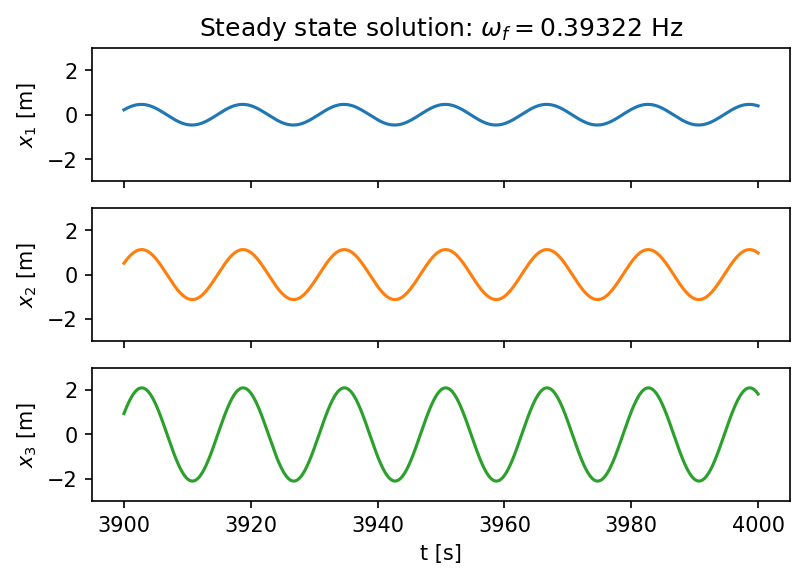

In [679]:
fig, axs = plt.subplots(3, 1,dpi=150)
axs[0].plot(t, z[0:1].T)
axs[0].set_title(r'Steady state solution: $\omega_f=$'+str(np.round(wf,5))+' Hz' )
axs[0].set(ylabel=r'$x_1$ [m]', ylim=[-3,3])
axs[1].plot(t, z[1:2].T, 'tab:orange')
axs[1].set(ylabel=r'$x_2$ [m]',ylim=[-3,3])
axs[2].plot(t, z[2:3].T, 'tab:green')
axs[2].set(ylabel=r'$x_3$ [m]',ylim=[-3,3])

for ax in axs.flat:
    ax.set(xlabel='t [s]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [681]:
d=50
wf=1.08402

In [682]:
# solve the ODE / initial value problem for a set of parameter values
sol = solve_ivp(coupledOscillators, [0, 4000], x0, args=[minv,cmat,kmat,d,wf],
                dense_output=True,method='Radau')

In [683]:
# table the solution against time
t = np.linspace(3900, 4000, 1000000)
z = sol.sol(t)

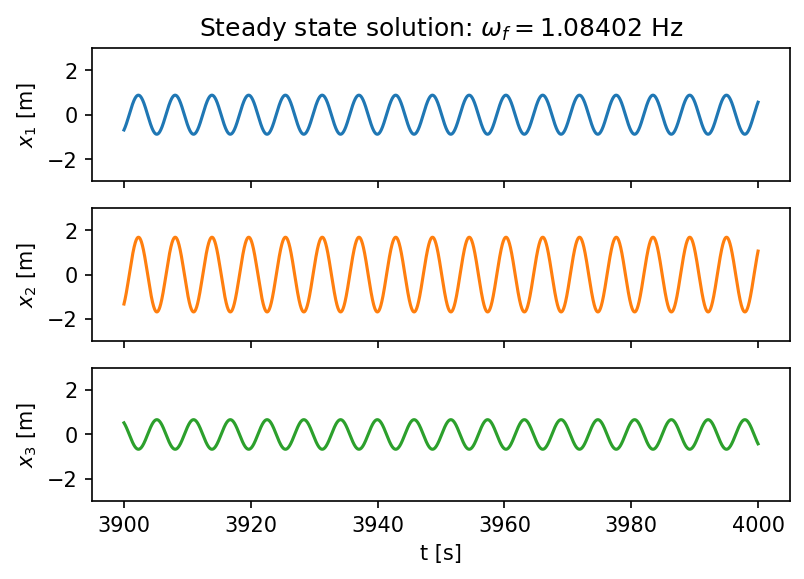

In [685]:
fig, axs = plt.subplots(3, 1,dpi=150)
axs[0].plot(t, z[0:1].T)
axs[0].set_title(r'Steady state solution: $\omega_f=$'+str(np.round(wf,5))+' Hz' )
axs[0].set(ylabel=r'$x_1$ [m]', ylim=[-3,3])
axs[1].plot(t, z[1:2].T, 'tab:orange')
axs[1].set(ylabel=r'$x_2$ [m]',ylim=[-3,3])
axs[2].plot(t, z[2:3].T, 'tab:green')
axs[2].set(ylabel=r'$x_3$ [m]',ylim=[-3,3])

for ax in axs.flat:
    ax.set(xlabel='t [s]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [686]:
d=50
wf=2.34597

In [687]:
# solve the ODE / initial value problem for a set of parameter values
sol = solve_ivp(coupledOscillators, [0, 4000], x0, args=[minv,cmat,kmat,d,wf],
                dense_output=True,method='Radau')

In [688]:
# table the solution against time
t = np.linspace(3900, 4000, 1000000)
z = sol.sol(t)

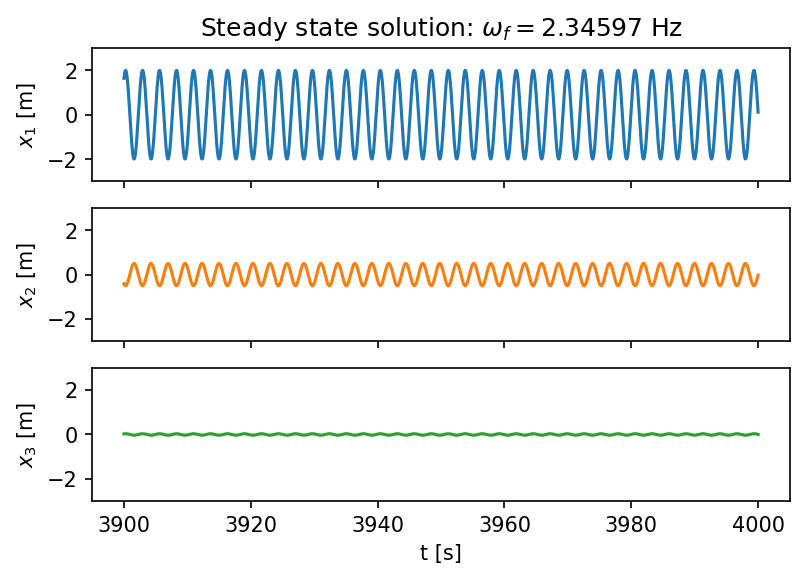

In [689]:
fig, axs = plt.subplots(3, 1,dpi=150)
axs[0].plot(t, z[0:1].T)
axs[0].set_title(r'Steady state solution: $\omega_f=$'+str(np.round(wf,5))+' Hz' )
axs[0].set(ylabel=r'$x_1$ [m]', ylim=[-3,3])
axs[1].plot(t, z[1:2].T, 'tab:orange')
axs[1].set(ylabel=r'$x_2$ [m]',ylim=[-3,3])
axs[2].plot(t, z[2:3].T, 'tab:green')
axs[2].set(ylabel=r'$x_3$ [m]',ylim=[-3,3])

for ax in axs.flat:
    ax.set(xlabel='t [s]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [690]:
d=50
wf=1

In [691]:
# solve the ODE / initial value problem for a set of parameter values
sol = solve_ivp(coupledOscillators, [0, 4000], x0, args=[minv,cmat,kmat,d,wf],
                dense_output=True,method='Radau')

In [692]:
# table the solution against time
t = np.linspace(3900, 4000, 1000000)
z = sol.sol(t)

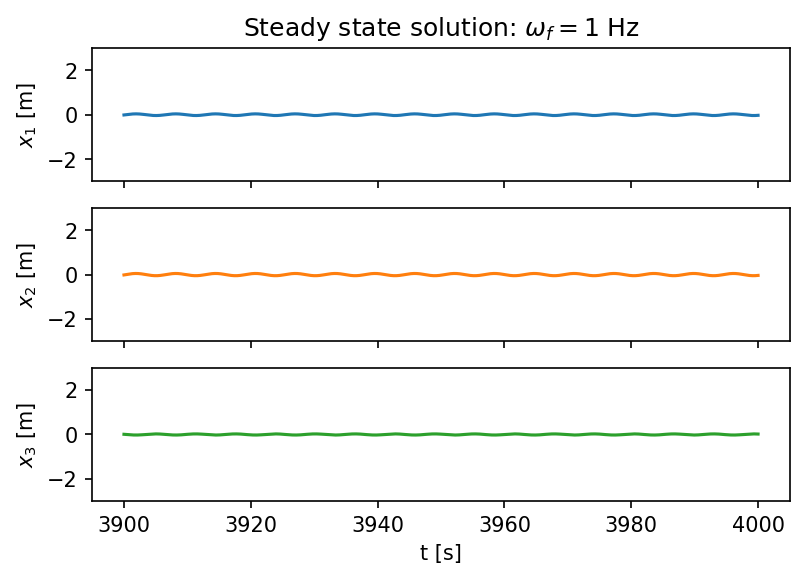

In [693]:
fig, axs = plt.subplots(3, 1,dpi=150)
axs[0].plot(t, z[0:1].T)
axs[0].set_title(r'Steady state solution: $\omega_f=$'+str(np.round(wf,5))+' Hz' )
axs[0].set(ylabel=r'$x_1$ [m]', ylim=[-3,3])
axs[1].plot(t, z[1:2].T, 'tab:orange')
axs[1].set(ylabel=r'$x_2$ [m]',ylim=[-3,3])
axs[2].plot(t, z[2:3].T, 'tab:green')
axs[2].set(ylabel=r'$x_3$ [m]',ylim=[-3,3])

for ax in axs.flat:
    ax.set(xlabel='t [s]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [635]:


freq=np.fft.fftfreq(len(t))
sp=np.fft.fft(z[0:1].T)

(-100.0, 100.0)

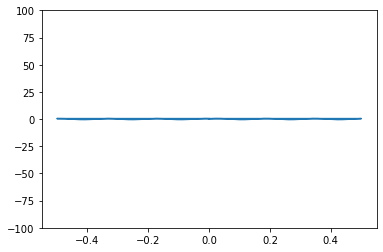

In [636]:
plt.plot(freq, sp.real)
plt.ylim(-100,100)

In [637]:
w0=np.sqrt(k[0]/m[0])

In [638]:
w0

1.7320508075688772

In [639]:
period0=2*np.pi/w0

In [640]:
15/period0

4.13496671566344

In [641]:
wfr=(c[0]+np.sqrt(c[0]**2+4*k[0]*m[0]))/(2*m[0])

In [642]:
wfr

1.7370580244322071

In [643]:
np.sqrt(5.50360466)

2.345976270127215

### Now try the decoupled eigensystem

In [644]:
coefficientMatrix=np.inner(minv,(kmat))  
coefficientMatrix

array([[ 5.        , -2.        ,  0.        ],
       [-1.        ,  1.5       , -0.5       ],
       [ 0.        , -0.33333333,  0.33333333]])

In [645]:
[eigenvalues,eigenvectors]=np.linalg.eig(coefficientMatrix)

In [646]:
eigenvectors

array([[-0.96960972, -0.43722873,  0.1914267 ],
       [ 0.24414999, -0.83617699,  0.46376719],
       [-0.01574063,  0.33111792,  0.86502937]])

In [647]:
sinv=np.linalg.inv(eigenvectors)

In [648]:
sinv

array([[-0.91463577,  0.46061484, -0.04454455],
       [-0.22790489, -0.8717123 ,  0.51778432],
       [ 0.07059466,  0.34205767,  0.95702089]])

In [649]:
s=eigenvectors

In [650]:
s

array([[-0.96960972, -0.43722873,  0.1914267 ],
       [ 0.24414999, -0.83617699,  0.46376719],
       [-0.01574063,  0.33111792,  0.86502937]])

In [651]:
np.inner(sinv,s.T)

array([[ 1.00000000e+00,  8.97815769e-18, -3.55551174e-17],
       [-4.31862977e-17,  1.00000000e+00,  5.17597690e-17],
       [-1.43569657e-17,  9.79110104e-17,  1.00000000e+00]])

In [652]:
eigenvalues

array([5.50360466, 1.17510495, 0.15462372])

In [653]:
np.inner(sinv,np.inner(coefficientMatrix,s))

array([[ 5.00000000e+00, -1.00000000e+00,  4.48353184e-18],
       [-2.00000000e+00,  1.50000000e+00, -3.33333333e-01],
       [-1.94504878e-16, -5.00000000e-01,  3.33333333e-01]])

In [654]:
eigensystemMatrix=np.diag(eigenvalues)

In [655]:
eigensystemMatrix

array([[5.50360466, 0.        , 0.        ],
       [0.        , 1.17510495, 0.        ],
       [0.        , 0.        , 0.15462372]])

In [656]:
eigensystemx0=np.zeros(len(x0))

In [657]:
eigensystemx0[0:3]=np.inner(s.T,x0[0:3])

In [658]:
omegas=np.sqrt(eigenvalues)

In [659]:
omegas

array([2.34597627, 1.08402258, 0.39322223])

In [660]:
2*np.pi/omegas

array([ 2.6782817 ,  5.79617568, 15.97871355])

Convert solution of x system into eigensystem

In [661]:
z[0:3,0]

array([0.22083017, 0.51351176, 0.94401891])

In [662]:
esol=[]

for i in range(len(z[0])):
   esol.append(np.inner(s.T,z[0:3,i]))

esola=np.array(esol)

In [663]:
esola

array([[-0.10360465, -0.21335844,  1.09702678],
       [-0.10361178, -0.21337398,  1.09711188],
       [-0.10361892, -0.21338953,  1.09719698],
       ...,
       [-0.175767  , -0.38360602,  2.1039328 ],
       [-0.17576256, -0.38359683,  2.10388527],
       [-0.17575812, -0.38358764,  2.10383774]])

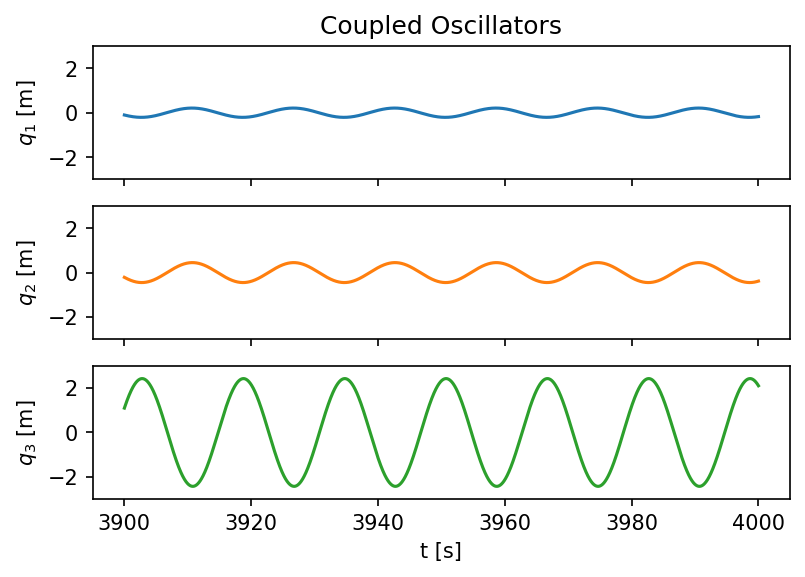

In [664]:
fig, axs = plt.subplots(3, 1,dpi=150)
axs[0].plot(t, esola[:,0:1])
axs[0].set_title('Coupled Oscillators')
axs[0].set(ylabel=r'$q_1$ [m]', ylim=[-3,3])
axs[1].plot(t, esola[:,1:2], 'tab:orange')
axs[1].set(ylabel=r'$q_2$ [m]',ylim=[-3,3])
axs[2].plot(t, esola[:,2:3], 'tab:green')
axs[2].set(ylabel=r'$q_3$ [m]',ylim=[-3,3])

for ax in axs.flat:
    ax.set(xlabel='t [s]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [199]:
# solve the ODE / initial value problem for a set of parameter values
sol = solve_ivp(coupledOscillators, [0, 100], eigensystemx0, args=[eigensystemMatrix],
                dense_output=True)

TypeError: coupledOscillators() missing 4 required positional arguments: 'cmat', 'kmat', 'd', and 'wf'

In [326]:
# table the solution against time
t = np.linspace(0, 50, 500)
z = sol.sol(t)

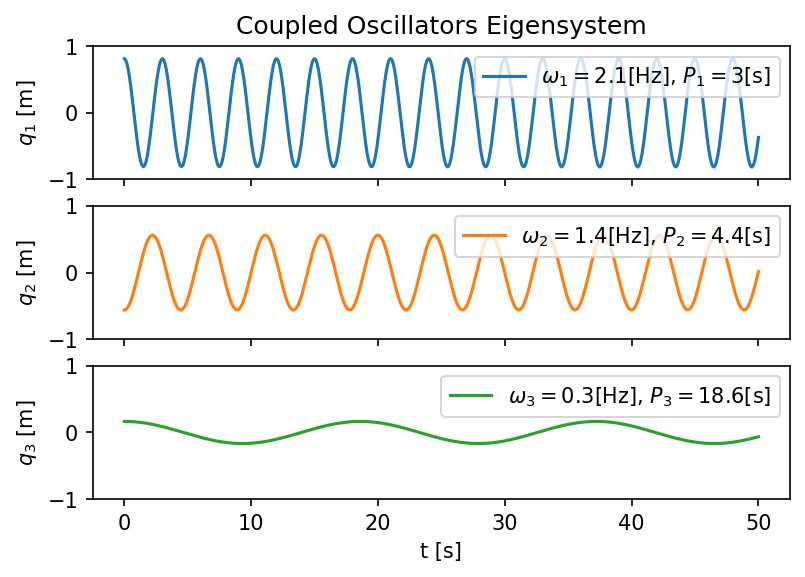

In [340]:
fig, axs = plt.subplots(3, 1,dpi=150)
axs[0].set_title('Coupled Oscillators Eigensystem')
axs[0].plot(t, z[0:1].T, label=r'$\omega_1=2.1$[Hz], $P_1=3$[s]')
axs[0].set(ylabel=r'$q_1$ [m]', ylim=[-1,1])
axs[0].legend(loc="upper right")
axs[1].plot(t, z[1:2].T, 'tab:orange', label=r'$\omega_2=1.4$[Hz], $P_2=4.4$[s]')
axs[1].set(ylabel=r'$q_2$ [m]',ylim=[-1,1])
axs[1].legend(loc="upper right")
axs[2].plot(t, z[2:3].T, 'tab:green', label=r'$\omega_3=0.3$[Hz], $P_3=18.6$[s]')
axs[2].set(ylabel=r'$q_3$ [m]',ylim=[-1,1])
axs[2].legend(loc="upper right")

for ax in axs.flat:
    ax.set(xlabel='t [s]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


In [356]:
nosci=20

In [357]:
x0=np.zeros(2*nosci)
x0[0]=1

In [358]:
x0

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [359]:
k=np.random.rand(nosci)*-1

In [360]:
k

array([-0.51427391, -0.63617872, -0.64365111, -0.49756199, -0.68230517,
       -0.97827409, -0.20058446, -0.23278452, -0.71796906, -0.52134022,
       -0.61572968, -0.66261748, -0.47563231, -0.06137071, -0.48689051,
       -0.99285444, -0.24427879, -0.57881548, -0.32235548, -0.1435054 ])

In [361]:
m=np.random.rand(nosci)

In [362]:
m

array([0.31442533, 0.9648657 , 0.12532235, 0.74937361, 0.02292076,
       0.83602913, 0.3024381 , 0.89712536, 0.13184459, 0.14705105,
       0.66461793, 0.36193035, 0.79349259, 0.25452406, 0.25241807,
       0.69476704, 0.68078437, 0.68882361, 0.7125638 , 0.30812783])

In [363]:
coefficientMatrix=np.matmul(minverse(m),kmatrix(k))

In [364]:
coefficientMatrix

array([[ -3.65890571,   2.02330622,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.65934432,  -1.32643312,   0.6670888 ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   5.13596437,  -9.10622191,   3.97025754,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  

In [365]:
# solve the ODE / initial value problem for a set of parameter values
sol = solve_ivp(coupledOscillators, [0, 100], x0, args=[coefficientMatrix],
                dense_output=True)

In [366]:
# table the solution against time
t = np.linspace(0, 100, 500)
z = sol.sol(t)

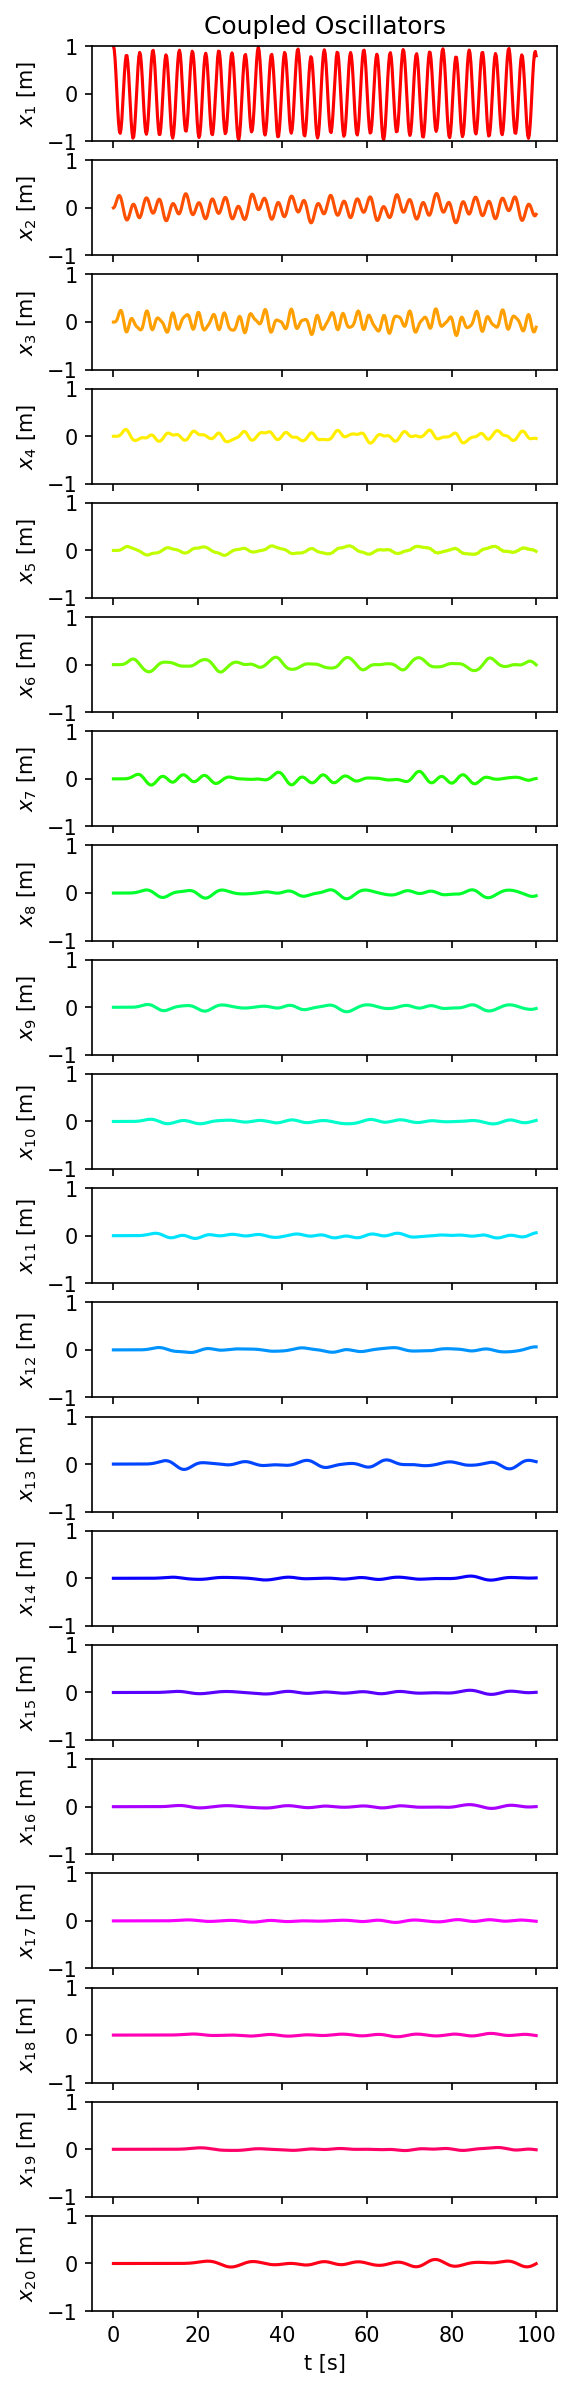

In [367]:
cmap = get_cmap(nosci)

fig, axs = plt.subplots(20, 1, dpi=150, figsize=(4,20),sharey=True)
axs[0].set_title('Coupled Oscillators' )
for i in range(20):
    axs[i].plot(t, z[i:i+1].T, c=cmap(i))
    axs[i].set( ylim=[-1,1])
    axs[i].set(ylabel=r'$x_{'+str(i+1) +'}$ [m]',ylim=[-1,1])

for ax in axs.flat:
    ax.set(xlabel='t [s]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# fig.add_subplot(111, frameon=False)
# # hide tick and tick label of the big axis
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    


In [368]:
[eigenvalues,eigenvectors]=np.linalg.eig(coefficientMatrix)

sinv=np.linalg.inv(eigenvectors)

s=eigenvectors

eigensystemMatrix=np.diag(eigenvalues)

eigensystemx0=np.zeros(len(x0))

eigensystemx0[0:nosci]=np.inner(s,x0[0:nosci])



In [369]:
# solve the ODE / initial value problem for a set of parameter values
sol = solve_ivp(coupledOscillators, [0, 100], eigensystemx0, args=[eigensystemMatrix],
                dense_output=True)

# table the solution against time
t = np.linspace(0, 100, 500)
z = sol.sol(t)

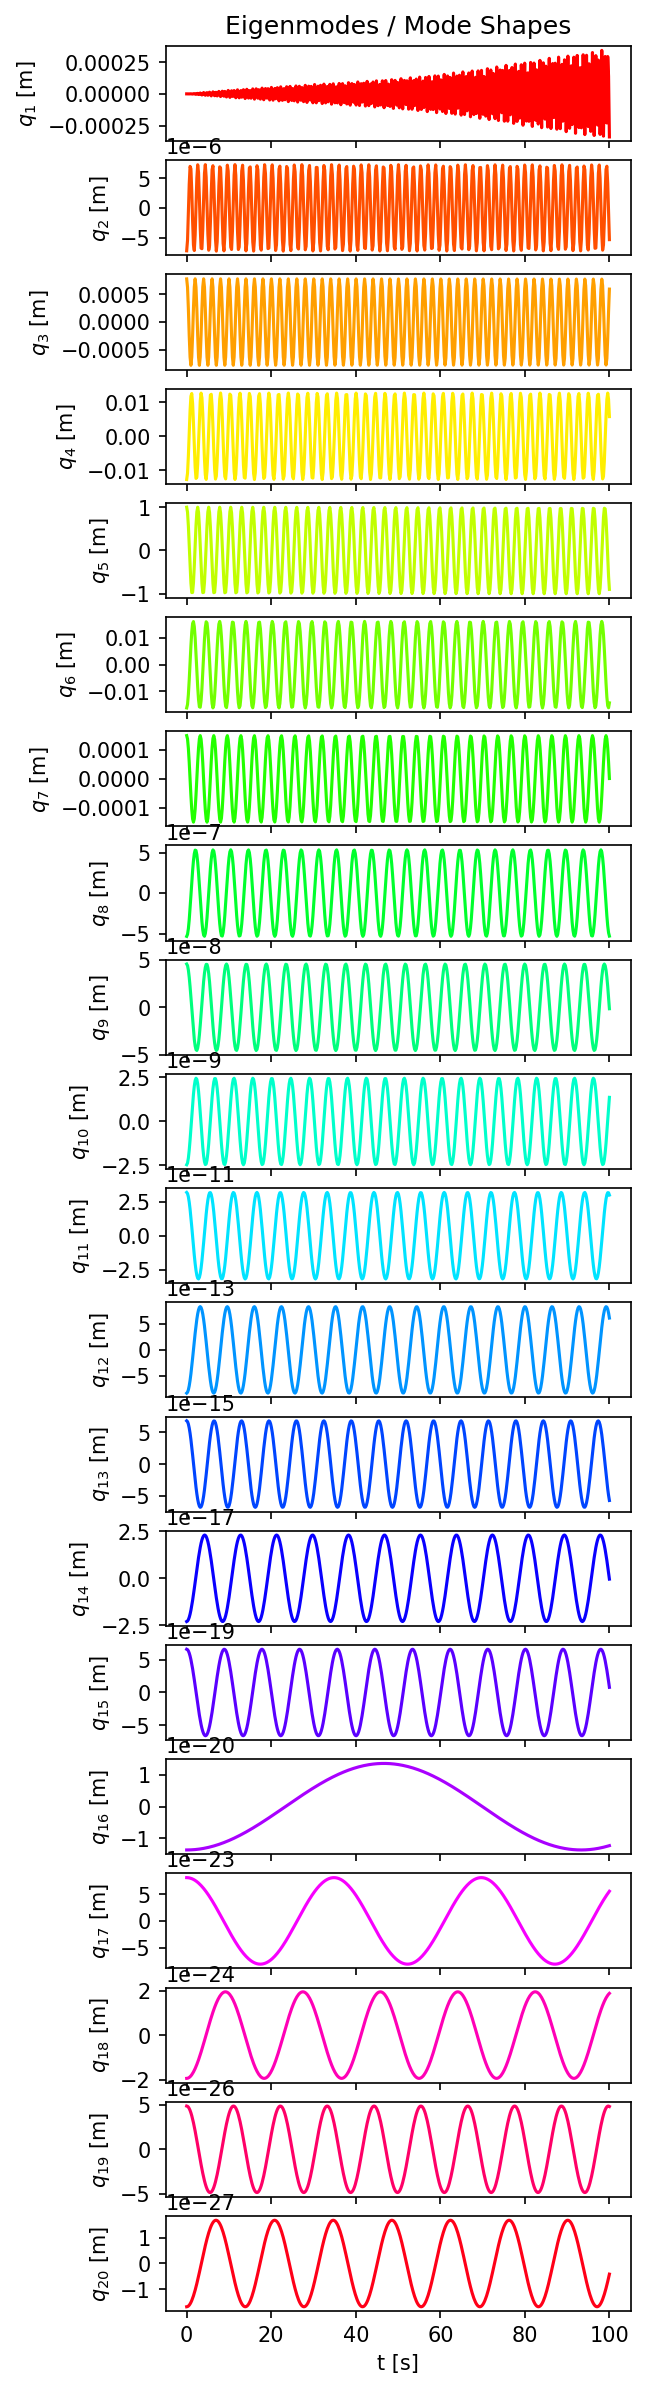

In [371]:
cmap = get_cmap(nosci)

fig, axs = plt.subplots(20, 1, dpi=150, figsize=(4,20))
axs[0].set_title('Eigenmodes / Mode Shapes' )
for i in range(20):
    axs[i].plot(t, z[i:i+1].T, c=cmap(i))
    #axs[i].set( ylim=[-1,1])
    axs[i].set(ylabel=r'$q_{'+str(i+1) +'}$ [m]')

for ax in axs.flat:
    ax.set(xlabel='t [s]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# fig.add_subplot(111, frameon=False)
# # hide tick and tick label of the big axis
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    